## **<span style="color: orange;">4. Ex-Post Analysis/Comparison</span>**

**<span style="color: white;">Important Reminder: After the original dataset runs through all the dataset, rerun the whole operation of the exploration part with the cleaned and initial dataset to compare the results and possibly create new or find solutions to some iomplications/interpretations.</span>**



## <span style="color: orange;">Data Exploration</span>

In [1]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Text processing
import string
import re
import warnings
warnings.filterwarnings('ignore')

# Install and import nltk and upprade if necessary libraries
%pip install nltk
import nltk
%pip install --upgrade pandas
%pip install openpyxl --upgrade


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Read both xsl files for the comparison of the data
initial_data = pd.read_excel('Group1.xlsx')
cleansed_data = pd.read_excel('df_complete_cleansing_1.xlsx')

In [3]:
initial_data # 2332 observations and 5 columns

,SenderID,ReceiverID,ActionType,NegoOutcome,Content
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n..."
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t..."
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ..."
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep..."
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal..."
...,...,...,...,...,...
2327,851,856,Counteroffer,FinalReject,"Dear Chis Meyer,\n \nthank you for your latest..."
2328,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nthank you very much for you..."
2329,851,856,Counteroffer,FinalReject,"Dear Chris Meyer,\nthank you for your fast ans..."
2330,856,851,Counteroffer,FinalReject,"Dear Alex Kramer,\nI am still very interested ..."


In [4]:
cleansed_data # 2332 rows × 13 columns

,SenderID,ReceiverID,ActionType,NegoOutcome,Content
0,70,69,Offer,FinalAccept,hope well management company agreed building f...
1,69,70,Counteroffer,FinalAccept,reaching mei apologize slight delay getting ba...
2,70,69,Counteroffer,FinalAccept,r kind response need hurry guess face daily fi...
3,69,70,Counteroffer,FinalAccept,swift reply read set proposal discussed collea...
4,70,69,Counteroffer,FinalAccept,proposal effort far seems getting close resolv...
...,...,...,...,...,...
2323,851,856,Counteroffer,FinalReject,latest offer point completely let u take corpo...
2324,856,851,Counteroffer,FinalReject,much latest offer happy could already reached ...
2325,851,856,Counteroffer,FinalReject,meyer fast answer happy found solution issue n...
2326,856,851,Counteroffer,FinalReject,still interested coming joint result neverthel...


#####  **<span style="color: orange;">Missing values</span>**

In [5]:
# Check for missing values
initial_data.isnull().sum()

SenderID       0
ReceiverID     0
ActionType     0
NegoOutcome    0
Content        0
dtype: int64

In [6]:
cleansed_data.isnull().sum()

SenderID       0
ReceiverID     0
ActionType     0
NegoOutcome    0
Content        0
dtype: int64

<p style="text-align: justify;">
The datasaet does not contain any missing values thus since they were handled in the cleansing of the part before. Duplicates are the same from before and will be ignored since the content is a different one and does not have a big impact on our data.
</p>

## **<span style="color: orange;"> Analyzing text statistics</span>**

For the comparison, we will run the same  standard exploration techniques like before:

- **<span style="color: teal;">word frequency analysis</span>**
- **<span style="color: teal;">sentence length analysis</span>**
- **<span style="color: teal;">average word length analysis</span>**


In [7]:
# Check the length of the content
initial_data["length"] = initial_data["Content"].str.len()
cleansed_data["length"] = cleansed_data["Content"].str.len()

In [8]:
import pandas as pd

# Word Count of each message
def word_count(content):
    content_list = content.split()
    return len(content_list)

initial_data['WordCount_basic'] = initial_data['Content'].apply(word_count)
cleansed_data['WordCount_basic'] = cleansed_data['Content'].apply(word_count)

In [9]:
# Display the first few rows of both dataframes
initial_data.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,429
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,439
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,409
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,345
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,343


In [10]:
cleansed_data.head()

,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic
0,70,69,Offer,FinalAccept,hope well management company agreed building f...,1604,214
1,69,70,Counteroffer,FinalAccept,reaching mei apologize slight delay getting ba...,1400,189
2,70,69,Counteroffer,FinalAccept,r kind response need hurry guess face daily fi...,1433,190
3,69,70,Counteroffer,FinalAccept,swift reply read set proposal discussed collea...,1042,140
4,70,69,Counteroffer,FinalAccept,proposal effort far seems getting close resolv...,1096,148


In [11]:
print(initial_data["NegoOutcome"].value_counts())
print(cleansed_data["NegoOutcome"].value_counts()) 

NegoOutcome
FinalAccept    1604
FinalReject     728
Name: count, dtype: int64
NegoOutcome
FinalAccept    1601
FinalReject     727
Name: count, dtype: int64


<p style="text-align: justify;">
After comparing both datasets, a notable difference in the basic structure is that we have 3 fewer acceptances and 1 fewer rejection since we dropped the empty rows during the cleansing and preprocessing of the data. Additionally, the content length is significantly smaller than before. This reduction is due to the removal of stopwords, organization names, and openings and closings, focusing more on the relevant words with more consistent meaning and weighting. Consequently, the word count has been halved, resulting in significantly fewer words per message than before.
</p>

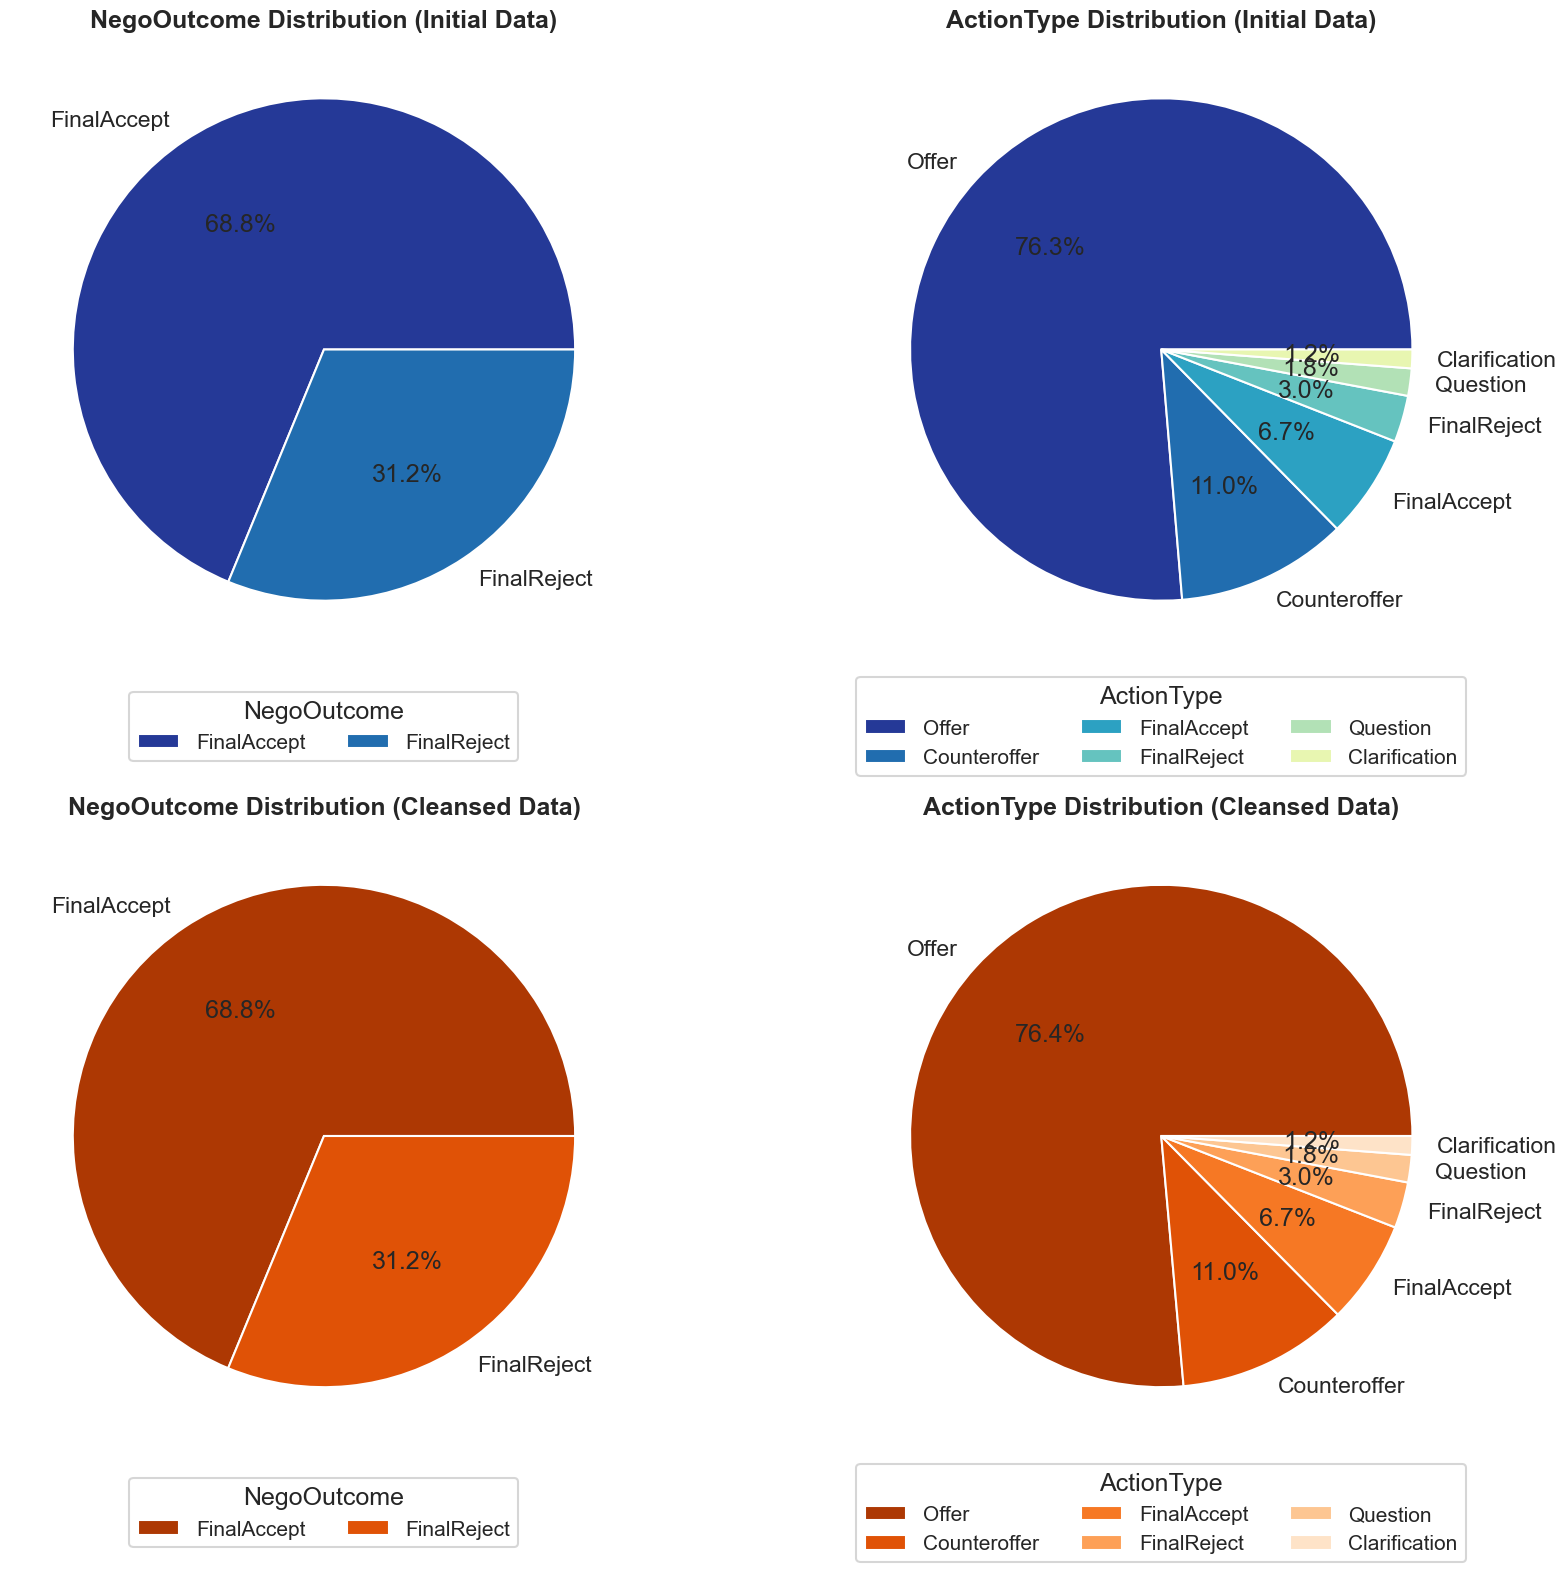

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose a color palette from colorbrewer and reverse it
colors = sns.color_palette("YlGnBu")[::-1]
colors2 = sns.color_palette("Oranges")[::-1]

# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Create a figure with subplots
plt.figure(figsize=(18, 16))

# Plot for NegoOutcome in initial_data
plt.subplot(2, 2, 1)
plt.pie(initial_data['NegoOutcome'].value_counts(), labels=initial_data['NegoOutcome'].unique().tolist(), autopct='%1.1f%%', colors=colors)
plt.title('NegoOutcome Distribution (Initial Data)', fontweight='bold')
plt.legend(title="NegoOutcome", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize='small')

# Plot for ActionType in initial_data
plt.subplot(2, 2, 2)
plt.pie(initial_data['ActionType'].value_counts(), labels=initial_data['ActionType'].unique().tolist(), autopct='%1.1f%%', colors=colors)
plt.title('ActionType Distribution (Initial Data)', fontweight='bold')
plt.legend(title="ActionType", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize='small')

# Plot for NegoOutcome in cleansed_data
plt.subplot(2, 2, 3)
plt.pie(cleansed_data['NegoOutcome'].value_counts(), labels=cleansed_data['NegoOutcome'].unique().tolist(), autopct='%1.1f%%', colors=colors2)
plt.title('NegoOutcome Distribution (Cleansed Data)', fontweight='bold')
plt.legend(title="NegoOutcome", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize='small')

# Plot for ActionType in cleansed_data
plt.subplot(2, 2, 4)
plt.pie(cleansed_data['ActionType'].value_counts(), labels=cleansed_data['ActionType'].unique().tolist(), autopct='%1.1f%%', colors=colors2)
plt.title('ActionType Distribution (Cleansed Data)', fontweight='bold')
plt.legend(title="ActionType", loc="center", bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize='small')

# Adjust layout
plt.tight_layout()
plt.show()

<p style="text-align: justify;">
Now, when comparing the pie charts, there is no significant difference since the overall relations and weightings remain the same. However, the proportion of offers increased by 0.1% in the cleansed dataset.
</p>

In [13]:
# Look into the acceptance and rejection messages
accepted_messages = initial_data[initial_data["NegoOutcome"] == "FinalAccept"]["Content"]
rejected_messages = initial_data[initial_data["NegoOutcome"] == "FinalReject"]["Content"]

# Look into the acceptance and rejection messages for cleansed data
accepted_messages_cleansed = cleansed_data[cleansed_data["NegoOutcome"] == "FinalAccept"]["Content"]
rejected_messages_cleansed = cleansed_data[cleansed_data["NegoOutcome"] == "FinalReject"]["Content"]

# Print accepted message
accepted_messages.values[1]

"Dear Mr. Novak, \nThank you for reaching out to me!I apologize for the slight delay in getting back to you, my colleagues and I are in the midst of preparing for our upcoming joint venture and we couldn't be more excited! As you already know, my name is Finn Mendel and I will be your correspondence for this period of time of solidifying the agreements between Hurm AG and SVN Tech respectively. \nI have read your proposal for the open issues of our joint venture, however I have some thoughts on what you have discussed. Below is my explanation:\xa0 \n \n Directors \n \nWhile we have agreed on the 5 members with a simple majority power, we believe having 4 members from Hurm AG will be more suitable for this venture. This is because our directors are extremely experienced and have completed multiple joint ventures before with other European countries. However, we will need 1 from SVN Tech for, as you mentioned previously, to deal with local authorities and partners successfully.\xa0 \n \n

In [14]:
# Print accepted message
accepted_messages_cleansed.values[1]

'reaching mei apologize slight delay getting back colleague midst preparing upcoming joint venture could nt excited already know name mendes correspondence period time solidifying agreement harm ag respectively read proposal open issue joint venture however thought discussed explanation director agreed member simple majority power believe member harm ag suitable venture director extremely experienced completed multiple joint venture country however need mentioned previously deal local authority partner successfully engineer fully agree send engineer svn tech interest push development green spirit engine however prior commitment local production fact far home propose work together improve product common worker agree u continue paying worker however believe worker specially hired joint venture paid equal term company additionally would appreciate much commonly hired worker could paid worker heard good reputation providing great working condition worker salary average however harm ag beli

In [15]:
# Print rejected message
rejected_messages.values[1]

'Dear Mr Novak, \nI am pleased to hear that you are happy about the joint venture because so are we at Hurm AG. I would like to thank you in advance for stipulating your points of discussion for us to make this partnership a reality. \nIn regards to the "board of directors", I would like Hurm AG to have 4 seats in the board. Since it is important for our company to carry the vision of our company throughout the project till its final stage of course with the help of SVN Tech representative in the board to provide the support and knowhow to realize our vision. \nIn regards to our engineers stay in Slovenia, it is impossible for them to stay that long due to their production commitments here Switzerland to ensure the success of our joint project. If needed, our engineers can stay in Slovenia for a maximum of 6 months to help to start the project and eventually train the staff. As for the additional compensation of the workers I do agree with the 15% paid by SVN proposed by you. \nFor the

In [16]:
# Print accepted message
rejected_messages_cleansed.values[1]

'pleased hear happy joint venture harm ag would like advance stimulating point discussion u make partnership reality board director would like harm ag seat board since important company carry vision company throughout project till final stage course help representative board provide support knowhow realize vision engineer stay slovenia impossible stay long due production commitment ensure success joint project needed engineer stay slovenia maximum help start project eventually train staff additional compensation worker agree paid proposed remaining issue would like propose jurisdiction handled court propose pay wage additional staff hired project paid equal term bus harm ag however avoid unnecessary administrative effort would like wage payment hired worker would administrated please question concern regarding position please hesitate ask important u together reach mutual understanding party benefit joint venture'

<p style="text-align: justify;">
Notable differences between the initial messages and cleansed messages include the removal of characters such as "!", ",", ".", and "/". Additionally, openings like "Dear Mr." and names like "Novak" are missing, indicating that the cleansing process worked correctly. Autocorrection also worked, as "stipulated" was converted to "stimulated," showing that preprocessing was effective. Lowercasing was applied, but organizations were not completely removed; for example, "Hurm AG" is still present but in lowercase, and "US" was changed to "u," possibly due to lemmatization or tokenization.
</p>

## **<span style="color: orange;">Overall important KPI's</span>**

In [17]:
import pandas as pd

# Function to process dataset and calculate word counts
def calculate_word_counts(df, dataset_name):
    # Look into the acceptance and rejection messages
    accepted_messages = df[df["NegoOutcome"] == "FinalAccept"]["Content"]
    rejected_messages = df[df["NegoOutcome"] == "FinalReject"]["Content"]

    # Overall word count for the whole dataset
    accepted_word_count_sum = accepted_messages.apply(word_count).sum()
    rejected_word_count_sum = rejected_messages.apply(word_count).sum()

    # Overall sum of all words
    total_word_count_sum = accepted_word_count_sum + rejected_word_count_sum

    # Calculate percentages
    accepted_word_count_percentage = (accepted_word_count_sum / total_word_count_sum) * 100
    rejected_word_count_percentage = (rejected_word_count_sum / total_word_count_sum) * 100

    # Create a DataFrame to display the results
    word_count_data = {
        'Dataset': [dataset_name],
        'Accepted Word Count': [accepted_word_count_sum],
        'Rejected Word Count': [rejected_word_count_sum],
        'Total Word Count': [total_word_count_sum],
        'Accepted Word Count (%)': [accepted_word_count_percentage],
        'Rejected Word Count (%)': [rejected_word_count_percentage]
    }

    return pd.DataFrame(word_count_data)

# Process both datasets
word_count_df_initial = calculate_word_counts(initial_data, 'Initial Data')
word_count_df_cleansed = calculate_word_counts(cleansed_data, 'Cleansed Data')

# Combine the results into a single DataFrame
word_count_df = pd.concat([word_count_df_initial, word_count_df_cleansed], ignore_index=True)
word_count_df

,Dataset,Accepted Word Count,Rejected Word Count,Total Word Count,Accepted Word Count (%),Rejected Word Count (%)
0,Initial Data,351688,186734,538422,65.318282,34.681718
1,Cleansed Data,153916,82059,235975,65.225554,34.774446


In [18]:

# Calculate the differences in word counts and percentages
accepted_word_count_diff = word_count_df_cleansed['Accepted Word Count'].values[0] - word_count_df_initial['Accepted Word Count'].values[0]
rejected_word_count_diff = word_count_df_cleansed['Rejected Word Count'].values[0] - word_count_df_initial['Rejected Word Count'].values[0]
total_word_count_diff = word_count_df_cleansed['Total Word Count'].values[0] - word_count_df_initial['Total Word Count'].values[0]

accepted_word_count_percentage_diff = word_count_df_cleansed['Accepted Word Count (%)'].values[0] - word_count_df_initial['Accepted Word Count (%)'].values[0]
rejected_word_count_percentage_diff = word_count_df_cleansed['Rejected Word Count (%)'].values[0] - word_count_df_initial['Rejected Word Count (%)'].values[0]

# Calculate the change in percentage for the absolute word counts
accepted_word_count_change_percentage = (accepted_word_count_diff / word_count_df_initial['Accepted Word Count'].values[0]) * 100
rejected_word_count_change_percentage = (rejected_word_count_diff / word_count_df_initial['Rejected Word Count'].values[0]) * 100
total_word_count_change_percentage = (total_word_count_diff / word_count_df_initial['Total Word Count'].values[0]) * 100

# Create a DataFrame to display the differences
word_count_diff_data = {
    'Accepted Word Count (%) Difference': [accepted_word_count_percentage_diff],
    'Rejected Word Count (%) Difference': [rejected_word_count_percentage_diff],
    'Accepted Word Count Change (%)': [accepted_word_count_change_percentage],
    'Rejected Word Count Change (%)': [rejected_word_count_change_percentage],
    'Total Word Count Change (%)': [total_word_count_change_percentage]
}

word_count_diff_df = pd.DataFrame(word_count_diff_data)
word_count_diff_df

,Accepted Word Count (%) Difference,Rejected Word Count (%) Difference,Accepted Word Count Change (%),Rejected Word Count Change (%),Total Word Count Change (%)
0,-0.092728,0.092728,-56.235072,-56.055673,-56.172853


<p style="text-align: justify;">

The accepted word count decreased by **<span style="color: teal;">56.24%</span>**.
The rejected word count decreased by **<span style="color: teal;">56.06%</span>**.
The total word count decreased by **<span style="color: teal;">56.17%</span>**.
so basically the cleansed dataset was halfed down related to its word count because of the cleansing part.

The proportion of accepted words decreased by **<span style="color: teal;">0.09%</span>**.
The proportion of rejected words increased by **<span style="color: teal;">0.09%</span>**.
These changes indicate that the cleansing process significantly reduced the overall word count while maintaining a relatively consistent distribution between accepted and rejected messages.
</p>

### **<span style="color: orange;">Calculating Average Lengths</span>**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from matplotlib.lines import Line2D

nltk.download('punkt')

def process_dataset(df, dataset_name):
    # Adding additional parameters to the current df based on the nltk library
    df['Content_Length'] = df['Content'].apply(len)
    df['Sentence_Count'] = df['Content'].apply(lambda x: len(sent_tokenize(x))) # using sent_tokenize to get the sentence count
    df['Word_Count_nltk'] = df['Content'].apply(lambda x: len(word_tokenize(x))) # using word_tokenize to get the word count

    # Calculate averages
    average_content_length = df['Content_Length'].mean()
    average_sentence_length = df['Content_Length'].sum() / df['Sentence_Count'].sum()
    average_word_length = df['Content_Length'].sum() / df['Word_Count_nltk'].sum()

    print(f"{dataset_name} - Average Content Length: {average_content_length}")
    print(f"{dataset_name} - Average Sentence Length: {average_sentence_length}")
    print(f"{dataset_name} - Average Word Length: {average_word_length}")

    return df

# Process both datasets
initial_data = process_dataset(initial_data, 'Initial Data')
cleansed_data = process_dataset(cleansed_data, 'Cleansed Data')

[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Initial Data - Average Content Length: 1291.4202401372213
Initial Data - Average Sentence Length: 98.42768898911658
Initial Data - Average Word Length: 5.03256403100827
Cleansed Data - Average Content Length: 728.5378006872852
Cleansed Data - Average Sentence Length: 728.5378006872852
Cleansed Data - Average Word Length: 7.1872327622373176


<p style="text-align: justify;">

The results show that after cleansing and removing stopwords, the average word length increases to **<span style="color: teal;">nearly 7.2</span>**, while the average content length decreases to **<span style="color: teal;">approx. 728.5</span>**. The sentence length is equal to the content length because periods were removed, causing the separation of sentences to disappear, and the entire message is seen as one long sentence.

</p>

In [20]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from matplotlib.lines import Line2D

nltk.download('punkt')

def process_dataset(df, dataset_name):
    # Adding additional parameters to the current df based on the nltk library
    df['Content_Length'] = df['Content'].apply(len)
    df['Sentence_Count'] = df['Content'].apply(lambda x: len(sent_tokenize(x))) # using sent_tokenize to get the sentence count
    df['Word_Count_nltk'] = df['Content'].apply(lambda x: len(word_tokenize(x))) # using word_tokenize to get the word count

    # Calculate averages for accepted and rejected content
    average_content_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Content_Length'].mean()
    average_content_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Content_Length'].mean()
    average_sentence_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Sentence_Count'].mean()
    average_sentence_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Sentence_Count'].mean()
    average_word_length_accepted = df[df['NegoOutcome'] == 'FinalAccept']['Word_Count_nltk'].mean()
    average_word_length_rejected = df[df['NegoOutcome'] == 'FinalReject']['Word_Count_nltk'].mean()

    # Calculate overall averages
    average_content_length_overall = df['Content_Length'].mean()
    average_sentence_length_overall = df['Sentence_Count'].mean()
    average_word_length_overall = df['Word_Count_nltk'].mean()

    print(f"{dataset_name} - Average Content Length (Accepted): {average_content_length_accepted}")
    print(f"{dataset_name} - Average Content Length (Rejected): {average_content_length_rejected}")
    print(f"{dataset_name} - Average Sentence Length (Accepted): {average_sentence_length_accepted}")
    print(f"{dataset_name} - Average Sentence Length (Rejected): {average_sentence_length_rejected}")
    print(f"{dataset_name} - Average Word Length (Accepted): {average_word_length_accepted}")
    print(f"{dataset_name} - Average Word Length (Rejected): {average_word_length_rejected}")
    print(f"{dataset_name} - Average Content Length (Overall): {average_content_length_overall}")
    print(f"{dataset_name} - Average Sentence Length (Overall): {average_sentence_length_overall}")
    print(f"{dataset_name} - Average Word Length (Overall): {average_word_length_overall}")

    return df, average_content_length_accepted, average_content_length_rejected, average_content_length_overall, average_sentence_length_accepted, average_sentence_length_rejected, average_sentence_length_overall, average_word_length_accepted, average_word_length_rejected, average_word_length_overall

# Process both datasets
initial_data, initial_avg_content_length_accepted, initial_avg_content_length_rejected, initial_avg_content_length_overall, initial_avg_sentence_length_accepted, initial_avg_sentence_length_rejected, initial_avg_sentence_length_overall, initial_avg_word_length_accepted, initial_avg_word_length_rejected, initial_avg_word_length_overall = process_dataset(initial_data, 'Initial Data')


[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Initial Data - Average Content Length (Accepted): 1224.3522443890274
Initial Data - Average Content Length (Rejected): 1439.190934065934
Initial Data - Average Sentence Length (Accepted): 12.413341645885287
Initial Data - Average Sentence Length (Rejected): 14.678571428571429
Initial Data - Average Word Length (Accepted): 243.5137157107232
Initial Data - Average Word Length (Rejected): 285.4739010989011
Initial Data - Average Content Length (Overall): 1291.4202401372213
Initial Data - Average Sentence Length (Overall): 13.120497427101201
Initial Data - Average Word Length (Overall): 256.61277873070327


In [21]:
cleansed_data, cleansed_avg_content_length_accepted, cleansed_avg_content_length_rejected, cleansed_avg_content_length_overall, cleansed_avg_sentence_length_accepted, cleansed_avg_sentence_length_rejected, cleansed_avg_sentence_length_overall, cleansed_avg_word_length_accepted, cleansed_avg_word_length_rejected, cleansed_avg_word_length_overall = process_dataset(cleansed_data, 'Cleansed Data')


Cleansed Data - Average Content Length (Accepted): 689.897564022486
Cleansed Data - Average Content Length (Rejected): 813.6313617606603
Cleansed Data - Average Sentence Length (Accepted): 1.0
Cleansed Data - Average Sentence Length (Rejected): 1.0
Cleansed Data - Average Word Length (Accepted): 96.13928794503435
Cleansed Data - Average Word Length (Rejected): 112.8748280605227
Cleansed Data - Average Content Length (Overall): 728.5378006872852
Cleansed Data - Average Sentence Length (Overall): 1.0
Cleansed Data - Average Word Length (Overall): 101.3655498281787


<p style="text-align: justify;">

Instead of plotting the graphs again like in the exploration in part 1 of the project, we will only show the noticeable changes in the content length averages. The trend remained the same since the distribution of outcomes was nearly unchanged. However, due to the removal of certain elements, a significant change in length was measured, as printed above. As already mentioned, sentences now have a count of **<span style="color: teal;">1</span>** because they are seen as one big message since the periods were removed, thus eliminating the separation of each sentence. The word count also decreased immensely, from **<span style="color: teal;">256.61</span>** to **<span style="color: teal;">101.36</span>**. These differences were expected due to the removal of stopwords, names, and also openings and closings, as they constitute a significant portion of the messages.
</p>

NegoOutcomeLabel is being included as a new column for later use in our predictions as our target variable since NegoOutcome itself is a string but we need a binary integer variable 0/1.

In [22]:
# Ensure scikit-learn is installed
# %pip install scikit-learn

# Add NegoOutcomeLabel to initial_data
initial_data["NegoOutcomeLabel"] = initial_data["NegoOutcome"].map({"FinalAccept": 1, "FinalReject": 0})
print("Initial Data:")
initial_data.head()

Initial Data:


,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel
0,70,69,Offer,FinalAccept,"Dear Mr. Mendel, \nHope you are doing well! \n...",2529,429,2529,17,470,1
1,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for reaching out t...",2579,439,2579,21,483,1
2,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank your kind response – ...",2336,409,2336,15,454,1
3,69,70,Counteroffer,FinalAccept,"Dear Mr. Novak, \nThank you for your swift rep...",1961,345,1961,13,381,1
4,70,69,Counteroffer,FinalAccept,"Dear Mr. Mendel, \nThank you for your proposal...",1917,343,1917,10,376,1


In [23]:
# Add NegoOutcomeLabel to cleansed_data
cleansed_data["NegoOutcomeLabel"] = cleansed_data["NegoOutcome"].map({"FinalAccept": 1, "FinalReject": 0})
print("Cleansed Data:")
cleansed_data.head()

Cleansed Data:


,SenderID,ReceiverID,ActionType,NegoOutcome,Content,length,WordCount_basic,Content_Length,Sentence_Count,Word_Count_nltk,NegoOutcomeLabel
0,70,69,Offer,FinalAccept,hope well management company agreed building f...,1604,214,1604,1,214,1
1,69,70,Counteroffer,FinalAccept,reaching mei apologize slight delay getting ba...,1400,189,1400,1,189,1
2,70,69,Counteroffer,FinalAccept,r kind response need hurry guess face daily fi...,1433,190,1433,1,190,1
3,69,70,Counteroffer,FinalAccept,swift reply read set proposal discussed collea...,1042,140,1042,1,140,1
4,70,69,Counteroffer,FinalAccept,proposal effort far seems getting close resolv...,1096,148,1096,1,148,1


### **<span style="color: orange;"> Word Cloud  </span>**

In [24]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


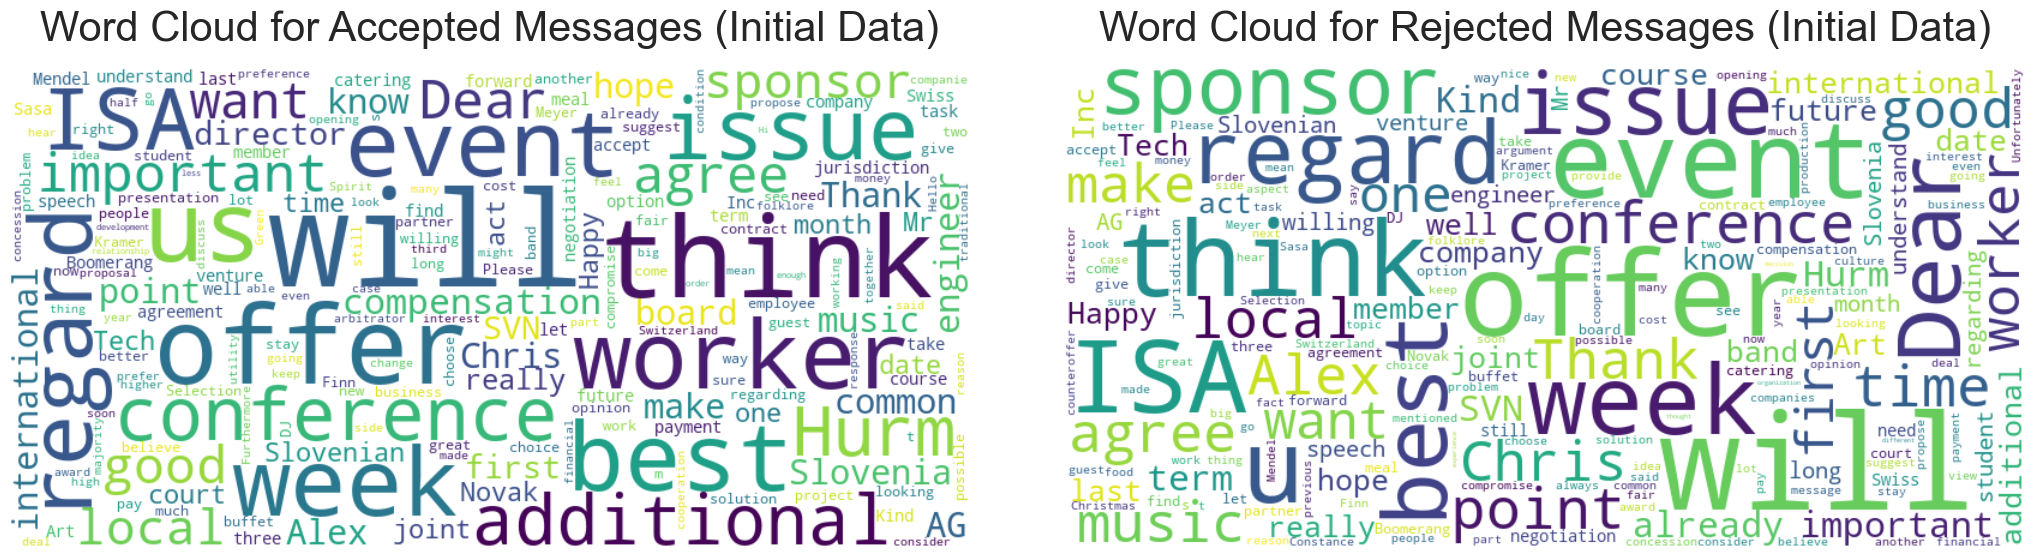

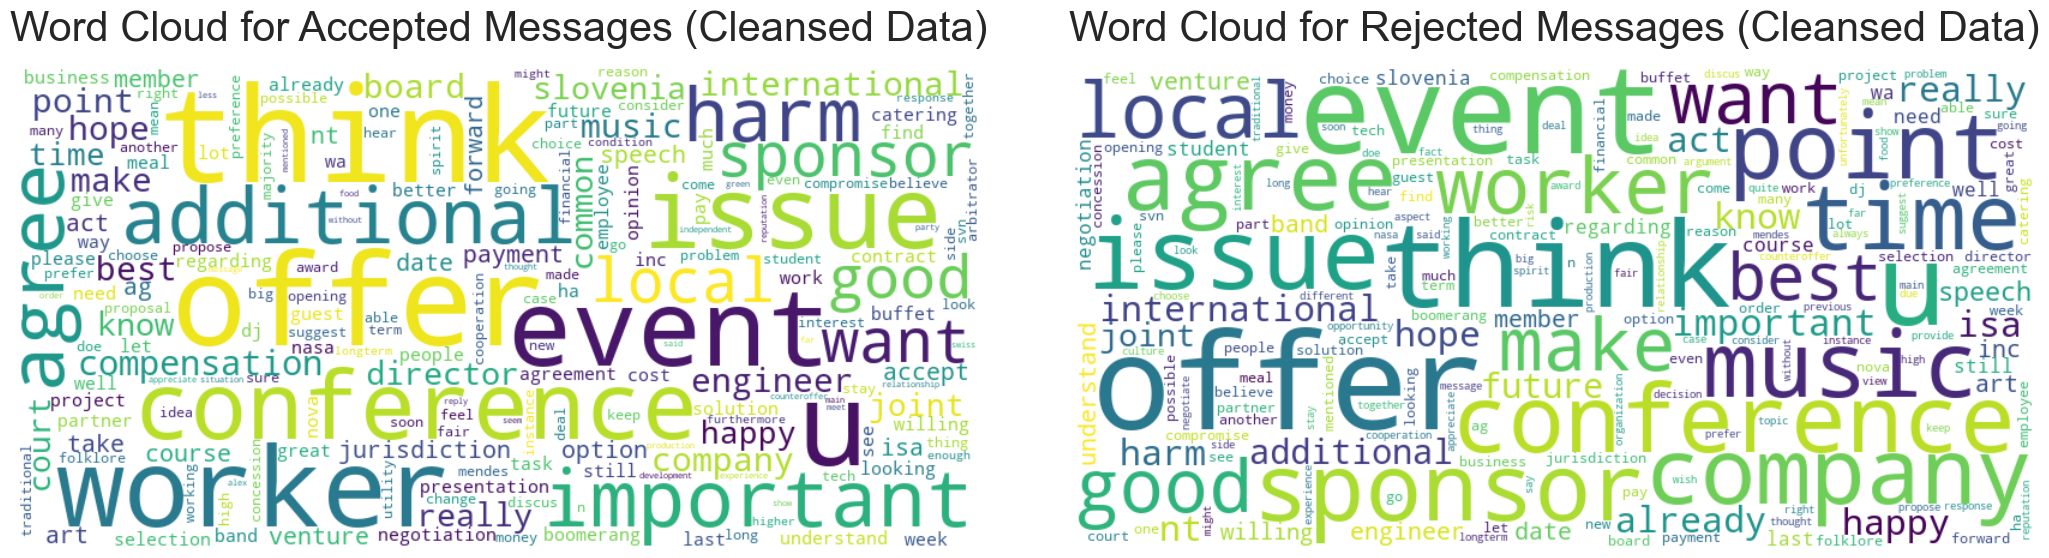

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordclouds(df, title_suffix):
    # Look into the acceptance and rejection messages
    accepted_messages = df[df["NegoOutcome"] == "FinalAccept"]["Content"]
    rejected_messages = df[df["NegoOutcome"] == "FinalReject"]["Content"]

    # Create a word cloud separately for accepted and rejected messages
    wordcloud_accepted = WordCloud(width=800, height=400, max_font_size=110, collocations=False, background_color='white').generate(' '.join(accepted_messages))
    wordcloud_rejected = WordCloud(width=800, height=400, max_font_size=110, collocations=False, background_color='white').generate(' '.join(rejected_messages))

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 8), gridspec_kw={'wspace': 0.1, 'hspace': 0.1})

    # Plot the word clouds
    ax1.imshow(wordcloud_accepted, interpolation='bilinear')
    ax1.set_title(f'Word Cloud for Accepted Messages ({title_suffix})', fontsize=30, pad=20)
    ax1.axis('off')
    ax1.spines['top'].set_visible(True)
    ax1.spines['right'].set_visible(True)
    ax1.spines['bottom'].set_visible(True)
    ax1.spines['left'].set_visible(True)

    ax2.imshow(wordcloud_rejected, interpolation='bilinear')
    ax2.set_title(f'Word Cloud for Rejected Messages ({title_suffix})', fontsize=30, pad=20)
    ax2.axis('off')
    ax2.spines['top'].set_visible(True)
    ax2.spines['right'].set_visible(True)
    ax2.spines['bottom'].set_visible(True)
    ax2.spines['left'].set_visible(True)

    plt.show()

# Generate word clouds for both datasets
generate_wordclouds(initial_data, "Initial Data")
generate_wordclouds(cleansed_data, "Cleansed Data")

<p style="text-align: justify;">

#### Before Pre-Processing
- The initial word clouds contained terms like **<span style="color: teal;">"Dear," "Alex," and "Chris"</span>**, which appear to be personal names or formal opening words. These likely added noise to the analysis since they do not contribute significant meaning to the context of the messages.
- Words such as **<span style="color: teal;">"Finn," "Swiss," and "Slovenia"</span>** appeared more prominently. These may represent specific instances or contextual mentions that are less relevant to the generalized analysis.
- There may have been inconsistencies in word cases or formatting that affected the frequency calculations.
- Common words like **<span style="color: teal;">"will" and "us"</span>** were prominently displayed, suggesting that stop words were not removed.

#### After Pre-Processing
- These noisy and non-contextual terms (e.g., **<span style="color: teal;">"Dear," "Alex," "Chris"</span>**) have been removed, making the word clouds more focused on relevant terms like **<span style="color: teal;">"conference," "important," "offer," and "sponsor"</span>**.
- Words related to the context of the messages (e.g., **<span style="color: teal;">"offer," "important," "issue"</span>**) are emphasized, which likely improves the utility of the analysis by focusing on meaningful terms.
- Standardization has likely aligned words to the same case (e.g., lowercase), making frequency counts more accurate.
- The prominence of such terms has decreased, indicating stop word removal, which enhances the interpretability of key terms.

### Similarities
Core thematic words like **<span style="color: teal;">"conference," "offer," "important," "worker," "agree," and "event"</span>** are still central to both word clouds, showing that preprocessing retained the essential topics and context of the messages. Both "accepted" and "rejected" categories still maintain their unique focus, with certain terms like **<span style="color: teal;">"music" and "sponsor"</span>** being more prominent in rejected messages.

### Changes
- Unnecessary and repetitive terms were removed, improving the clarity of the visualization.
- More weight is given to meaningful, context-specific terms, highlighting the semantic essence of the messages.
- Irrelevant entities and artifacts (e.g., names, formalities) no longer obscure the interpretation.

The pre-processing steps significantly enhanced the analytical clarity of the word clouds by filtering noise, standardizing the text, and focusing on relevant terms. This makes it easier to derive actionable insights from the data. The thematic consistency between pre- and post-processed clouds indicates that preprocessing did not distort the primary message content but rather refined it for better analysis.
</p>

## **<span style="color: orange;"> Topic modeling exploration with pyLDAvis </span>**
<p style="text-align: justify;">
</p>



Now, for the topic LDA modeling, we will only run the cleansed data as the interactive plot takes a while. If you want to compare it further with the initial data, you can look at the initial data from the previous notebook file or change the dataframe in the code to initial_data.

In [26]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [27]:
import ssl
import nltk
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
from gensim import corpora
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def preprocess_df(df):
    corpus = []
    lem = WordNetLemmatizer()
    stop = set(stopwords.words('english'))
    for content in df['Content']:
        words = [w for w in word_tokenize(content) if (w.lower() not in stop)]
        words = [lem.lemmatize(w) for w in words if len(w) > 2]
        corpus.append(words)
    return corpus

[nltk_data] Downloading package punkt to C:\Users\TColt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\TColt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TColt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
%pip install gensim


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
# Preprocess the cleansed data
corpus = preprocess_df(cleansed_data)

In [30]:
# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus]

In [31]:
# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=5, id2word=dictionary, passes=15)

In [32]:
# Install pyLDAvis if not already installed
%pip install pyLDAvis

# Visualize the topics using PyLDAvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<p style="text-align: justify;">

It's already evident that the most common words in each topic are words like **<span style="color: teal;">"would"</span>**, **<span style="color: teal;">"offer"</span>**, etc. Now the distribution makes more sense after stopwords, names, and closing and opening phrases were removed. It got limited to the relevant words that may impact the final decision, and this will possibly help us in the modeling phase.
</p>

### **<span style="color: orange;"> N-gram exploration </span>**
N-grams are simply contiguous sequences of n words. For example. We will look into the most frequent n-grams to see if we can find any pattern that may help us understand the data better

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

# Ensure stop_words is a list
stop_words = list(STOPWORDS)

# Define the function to process n-grams
def plot_top_ngrams_barchart(text_series, n=3):
    # Convert the text series into a list of documents
    corpus = text_series.tolist()

    # Create the CountVectorizer for n-grams
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)

    # Sum up the occurrences of each n-gram
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Select the top 20 n-grams
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])

    # Create a custom color palette
    colors = sns.color_palette("YlGnBu", len(ngram_df))[::-1]  # Reverse the palette

    # Plot the n-grams
    fig, ax = plt.subplots(figsize=(12, 6))
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, ax=ax, color=colors[:len(ngram_df)])
    ax.invert_yaxis()
    ax.set_xlabel("Frequency")
    ax.set_title(f"Top {n}-grams")
    plt.show()

    return words_freq, sum_words

In [34]:
# Function to create subplots for accepted and rejected messages
def create_subplots(df1, df2, n=2):
    accepted_messages_initial = df1[df1["NegoOutcome"] == "FinalAccept"]["Content"]
    rejected_messages_initial = df1[df1["NegoOutcome"] == "FinalReject"]["Content"]
    accepted_messages_cleansed = df2[df2["NegoOutcome"] == "FinalAccept"]["Content"]
    rejected_messages_cleansed = df2[df2["NegoOutcome"] == "FinalReject"]["Content"]

    # Create subplots for accepted messages
    fig, axes = plt.subplots(1, 2, figsize=(48, 12))
    fig.suptitle('Top n-grams in Accepted Messages', fontsize=20)

    # Plot for initial data
    corpus = accepted_messages_initial.tolist()
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])
    colors = sns.color_palette("YlGnBu", len(ngram_df))[::-1]
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, ax=axes[0], color=colors[:len(ngram_df)])
    axes[0].invert_yaxis()
    axes[0].set_xlabel("Frequency")
    axes[0].set_title("Initial Data")

    # Plot for cleansed data
    corpus = accepted_messages_cleansed.tolist()
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])
    colors = sns.color_palette("YlGnBu", len(ngram_df))[::-1]
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, ax=axes[1], color=colors[:len(ngram_df)])
    axes[1].invert_yaxis()
    axes[1].set_xlabel("Frequency")
    axes[1].set_title("Cleansed Data")

    plt.show()

    # Create subplots for rejected messages
    fig, axes = plt.subplots(1, 2, figsize=(48, 12))
    fig.suptitle('Top n-grams in Rejected Messages', fontsize=20)

    # Plot for initial data
    corpus = rejected_messages_initial.tolist()
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])
    colors = sns.color_palette("YlGnBu", len(ngram_df))[::-1]
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, ax=axes[0], color=colors[:len(ngram_df)])
    axes[0].invert_yaxis()
    axes[0].set_xlabel("Frequency")
    axes[0].set_title("Initial Data")

    # Plot for cleansed data
    corpus = rejected_messages_cleansed.tolist()
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])
    colors = sns.color_palette("YlGnBu", len(ngram_df))[::-1]
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, ax=axes[1], color=colors[:len(ngram_df)])
    axes[1].invert_yaxis()
    axes[1].set_xlabel("Frequency")
    axes[1].set_title("Cleansed Data")

    plt.show()

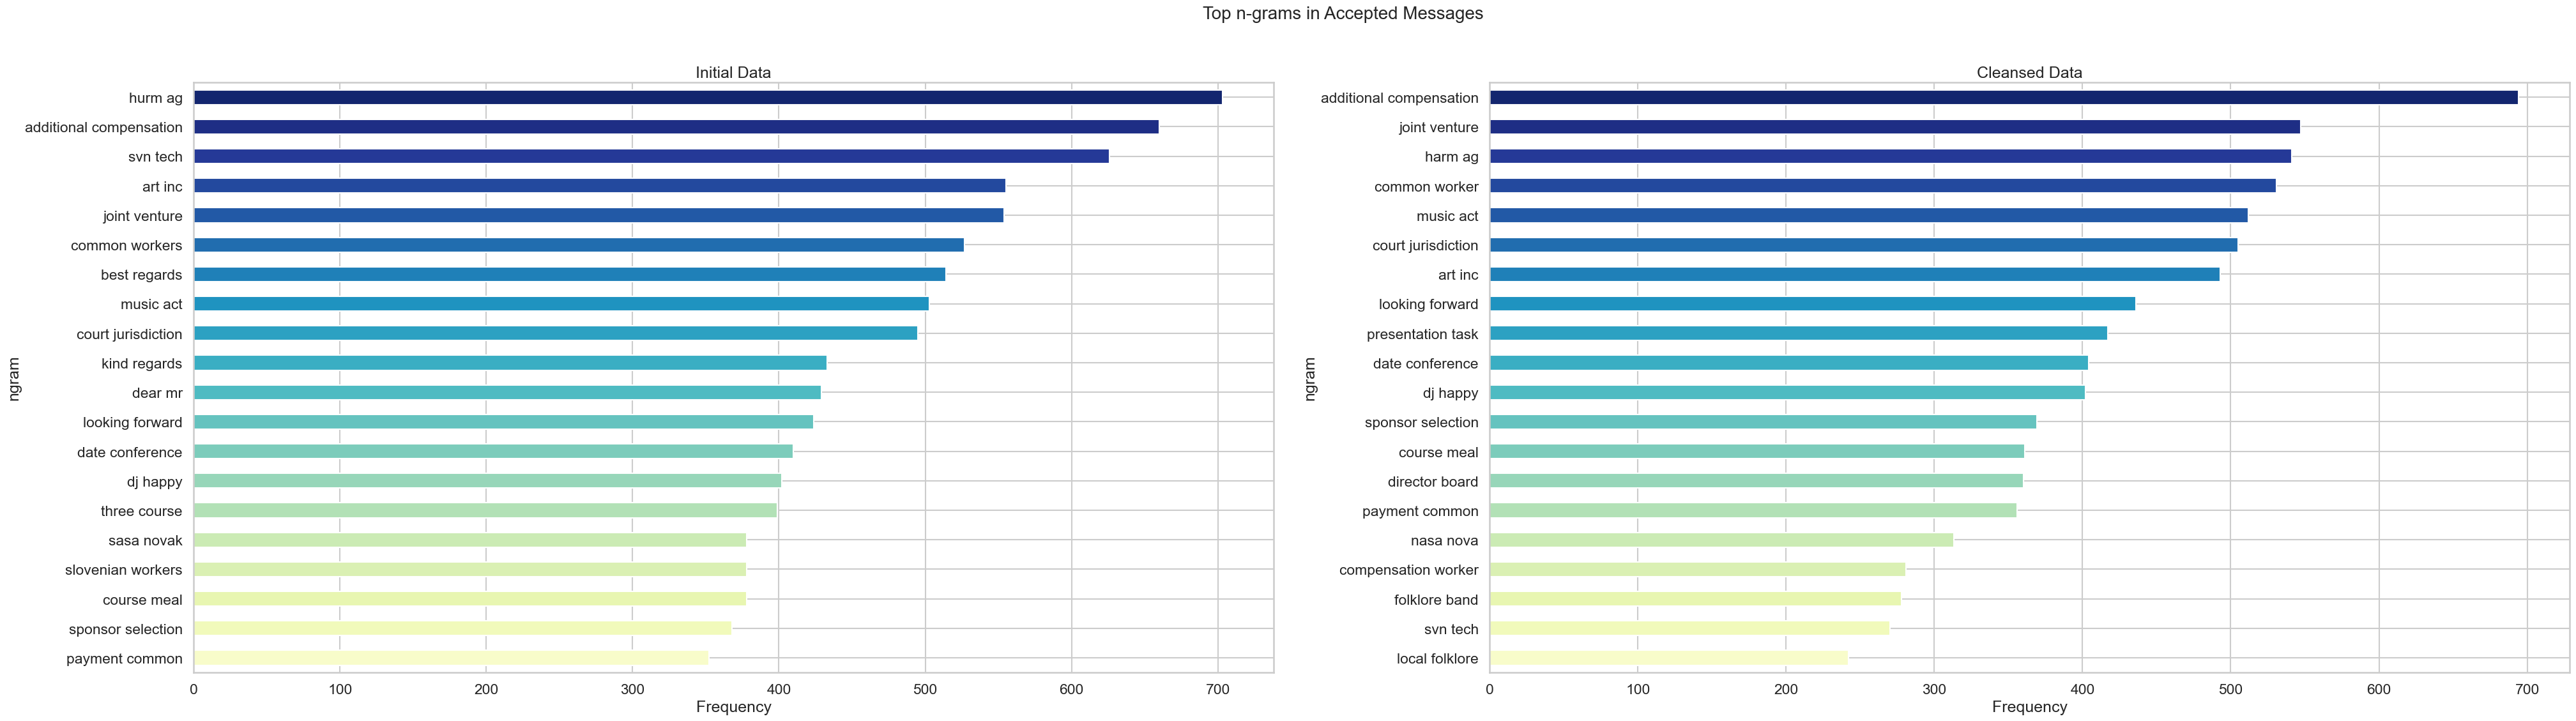

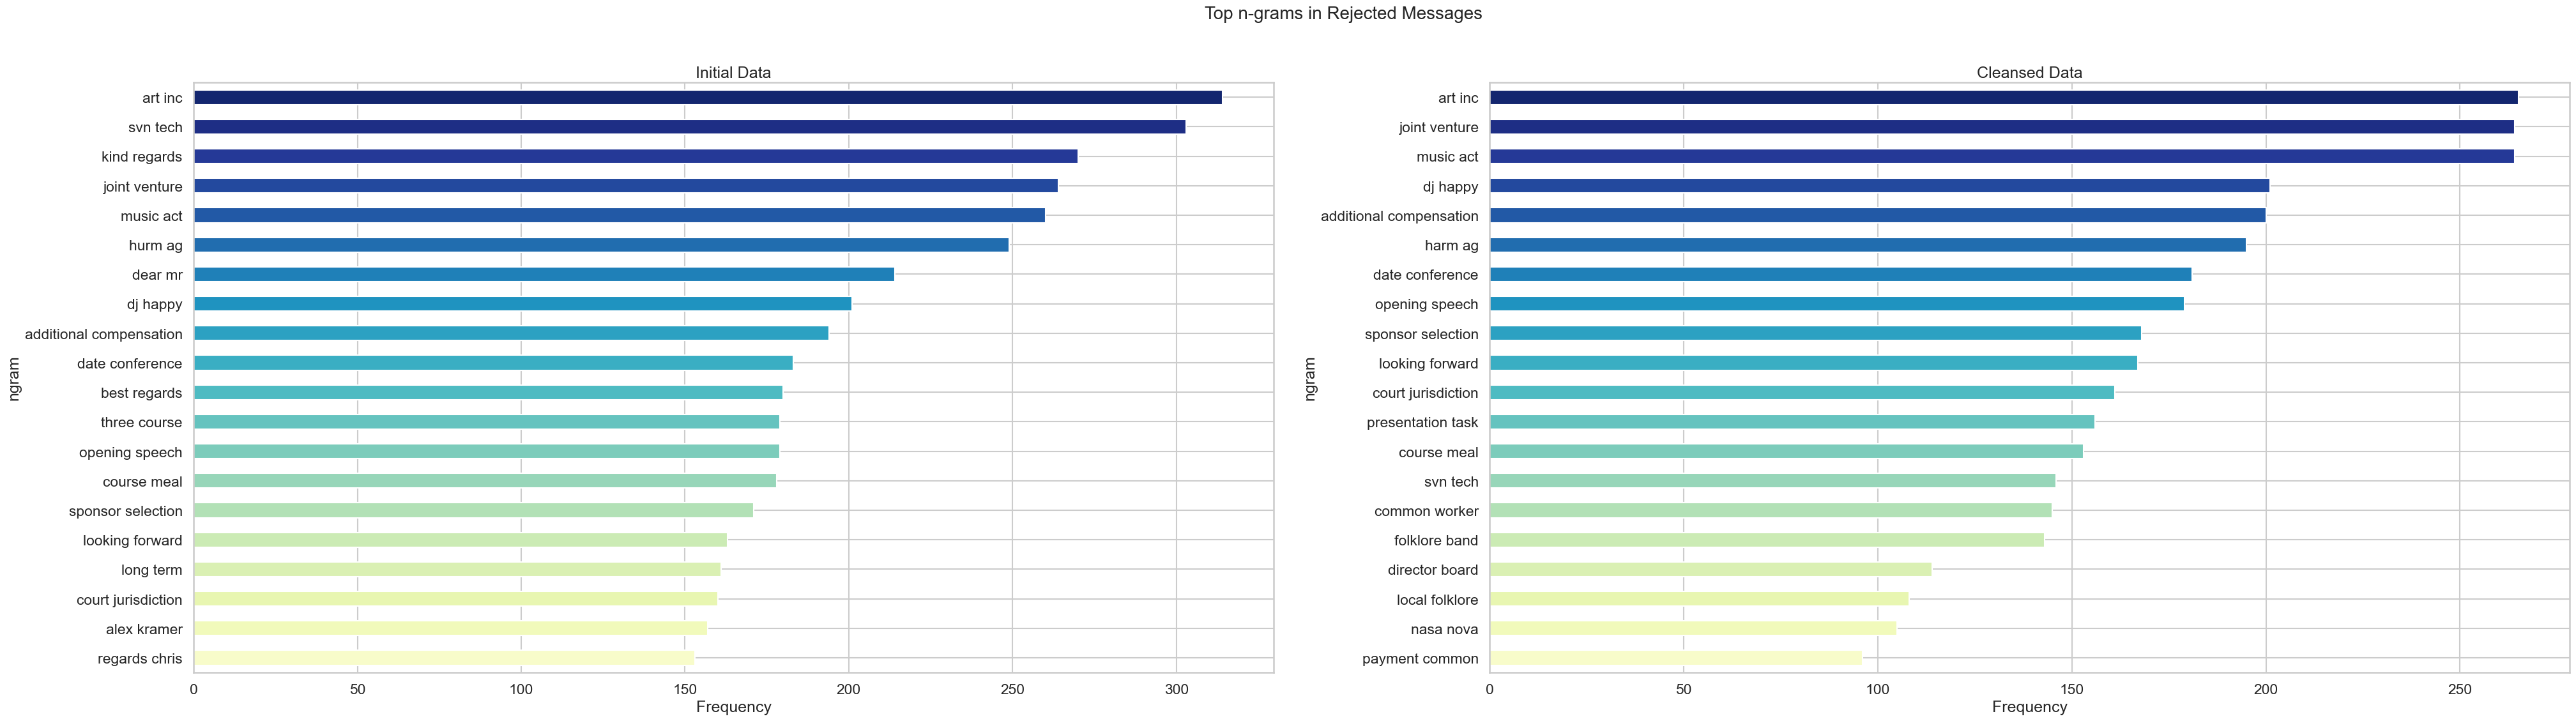

In [35]:
# Use the functions and process both datasets
create_subplots(initial_data, cleansed_data, n=2)# adapt the n to look for bi,tri-grams etc.

<p style="text-align: justify;">
The chart shows the top 2-grams (frequent word pairs) in a text corpus. "hurm ag" and "svn tech" are the most common, followed by "art inc" and "additional compensation". The bigrams suggest themes related to business, legal matters (e.g., "joint venture," "court jurisdiction"), and formal communication ("kind regards," "best regards"). These observations align with the previous data, indicating that organizations like HURM and openings like "Dear Mr/Mrs" often come together with closings like "best regards". It may be smart to exclude these common phrases since they do not constitute a significant percentage of the data and could bias the results if considered as parameters in our variables.
</p>

Before pre-processing, the data contained several prominent n-grams such as <span style="color: teal;">"hurm ag," "additional compensation," "svn tech," "art inc"</span>. However, there were also many noisy entries like <span style="color: teal;">"sasa novak," "three course," "dear mr," "kind regards"</span>, which added little analytical value. Additionally, redundancy and noise were evident with n-grams like <span style="color: teal;">"dear mr," "regards chris," "alex kramer," "three course"</span>.

After pre-processing, the data showed a significant improvement in clarity and relevance. Prominent n-grams shifted to more meaningful phrases such as <span style="color: teal;">"additional compensation," "joint venture," "common worker"</span>. Noise was effectively removed, eliminating terms like <span style="color: teal;">"sasa novak," "three course," "kind regards," "dear mr"</span>. The focus was added to contextually relevant phrases like <span style="color: teal;">"presentation task," "payment common," "local folklore"</span>. Prominent n-grams in the rejected messages also improved, highlighting terms like <span style="color: teal;">"art inc," "joint venture," "music act," "dj happy"</span>. Noise reduction was evident with the removal of <span style="color: teal;">"alex kramer," "regards chris," "kind regards," "dear mr"</span>, and contextual clarity was enhanced with phrases like <span style="color: teal;">"sponsor selection," "folklore band"</span>.

### Key Changes
- Removal of generic greetings and names
- Retention of core n-grams with clearer context-specific phrases
- Improved thematic balance with terms like <span style="color: teal;">"local folklore," "presentation task"</span>
- Overall Pre-Processing Impact
- Enhanced relevance of terms like <span style="color: teal;">"compensation worker," "joint venture"</span>
- Removal of irrelevant names and phrases
- Improved clarity by excluding generic greetings and closings
- Noise reduction by removing names, greetings, and formalities
- Improved focus on thematic and contextually relevant n-grams
- Reduction of redundancy and irrelevant phrases

Core terms like <span style="color: teal;">"joint venture," "art inc," "music act"</span> remained consistent
Thematic relevance of accepted and rejected messages persisted, showing preprocessing did not distort the content and that the issues that are being handled in the negotiation are mostly covered around compensations, joint ventures, dsirector board etc.

## **<span style="color: orange;"> Named Entity Recognitions </span>**

In [36]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
#donwload the model separetely so it can be imported in the next cell
!python -m spacy download en_core_web_sm  


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
      --------------------------------------- 0.2/12.8 MB 1.6 MB/s eta 0:00:08
     - -------------------------------------- 0.4/12.8 MB 2.6 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/12.8 MB 3.1 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/12.8 MB 3.2 MB/s eta 0:00:04
     --- ------------------------------------ 1.0/12.8 MB 3.4 MB/s eta 0:00:04
     --- ------------------------------------ 1.2/12.8 MB 3.6 MB/s eta 0:00:04
     ---- ----------------------------------- 1.5/12.8 MB 3.7 MB/s eta 0:00:04
     ----- ---------------------------------- 1.7/12.8 MB 3.8 MB/s eta 0:00:03
     ------ --------------------------------- 1.9/12.8 MB 4.0 MB/s eta 0:00:03
     ------ --------------------------------- 2.2/12.8 MB 4.1 MB/


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
# Named entity recognition
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("Model loaded successfully!")

Model loaded successfully!


In [39]:
import spacy
from spacy import displacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Visualize named entities
def visualize_named_entities(text, dataset_name):
    """
    Process the text and visualize named entities using spaCy's displacy.
    """
    doc = nlp(text)
    print(f"Visualizing named entities for {dataset_name}")
    displacy.render(doc, style="ent", jupyter=True)

# Example usage: Visualize NER for a sample message from both datasets
sample_text_initial = initial_data['Content'].iloc[0]  # Adjust column name if needed
visualize_named_entities(sample_text_initial, "Initial Data")


spaCy model loaded successfully!
Visualizing named entities for Initial Data


c:\Users\TColt\AppData\Local\Programs\Python\Python312\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


In [40]:
sample_text_cleansed = cleansed_data['Content'].iloc[0]  # Adjust column name if needed
visualize_named_entities(sample_text_cleansed, "Cleansed Data")

Visualizing named entities for Cleansed Data


c:\Users\TColt\AppData\Local\Programs\Python\Python312\Lib\site-packages\spacy\displacy\__init__.py:69: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


<p style="text-align: justify;">
Before pre-processing, the text contained personal names like <span style="color: teal;">"Mr. Mendel," "Sasa Novak"</span> and formal phrases such as <span style="color: teal;">"Dear Mr.," "kind regards"</span>. These names and formalities were present, adding unnecessary length and reducing the relevance of the content. After pre-processing, these names and formalities were removed, resulting in a more concise and relevant text.

The text before pre-processing also included specific instances and repetitive phrases like <span style="color: teal;">"sasa novak," "three course," "dear mr," "kind regards"</span>. These noisy entries detracted from the overall clarity and focus of the content. After pre-processing, these noisy entries were removed, allowing the text to focus on more relevant content.

Initially, the text featured terms like <span style="color: teal;">"hurm ag," "svn tech," "art inc"</span>, which were less contextually relevant. After pre-processing, the focus shifted to more meaningful phrases such as <span style="color: teal;">"additional compensation," "joint venture," "common worker"</span>, enhancing the overall relevance of the text.

Before pre-processing, the text contained redundant and non-informative n-grams like <span style="color: teal;">"dear mr," "regards chris," "alex kramer," "three course"</span>. These were removed during pre-processing, which improved the clarity and relevance of the text.

Finally, the text before pre-processing included general phrases and names that added little analytical value. After pre-processing, contextually relevant phrases like <span style="color: teal;">"sponsor selection," "folklore band"</span> became more prominent, improving the overall thematic relevance and making the text more focused and informative.
</p>

In [41]:
from collections import defaultdict

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Extract entities from all rows
def extract_entities_from_dataset(dataset, dataset_name):
    """
    Extract named entities from a dataset and group them by type.
    """
    all_entities = defaultdict(list)
    total_words = 0
    for text in dataset['Content']:
        doc = nlp(text)
        total_words += len(doc)
        for ent in doc.ents:
            all_entities[ent.label_].append(ent.text)
    return all_entities, total_words

spaCy model loaded successfully!


Here we can see all of identified named entities in the negotiation messages.

In [42]:
# Process both datasets
entities_initial, total_words_initial = extract_entities_from_dataset(initial_data, "Initial Data")
entities_cleansed, total_words_cleansed = extract_entities_from_dataset(cleansed_data, "Cleansed Data")


In [43]:
# Convert entities to a DataFrame for better readability
def convert_entities_to_df(entities):
    entity_summary = {entity_type: list(set(entity_list)) for entity_type, entity_list in entities.items()}
    entity_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in entity_summary.items()]))
    return entity_df

entity_df_initial = convert_entities_to_df(entities_initial)
entity_df_cleansed = convert_entities_to_df(entities_cleansed)

In [44]:
# Display the extracted entities grouped by type for initial
print("Entities in Initial Data:")
print(entity_df_initial)

Entities in Initial Data:
                                  PERSON              NORP  \
0    Chris Meyer                                    german   
1                   Finn Mendel  \n  \n   Slovenianworkers   
2                           Alex Krammer            Balkan   
3                                 M. Kos         Slovenian   
4                         Dear M. Mendel          american   
..                                   ...               ...   
911                                  NaN               NaN   
912                                  NaN               NaN   
913                                  NaN               NaN   
914                                  NaN               NaN   
915                                  NaN               NaN   

                                                   ORG   ORDINAL    CARDINAL  \
0                                          Association     first      5 -> 4   
1    the International Conference on Economics and ...    fourth  abo

In [45]:
# Display the extracted entities grouped by type for cleansed
print("\nEntities in Cleansed Data:")
print(entity_df_cleansed)


Entities in Cleansed Data:
                                                   ORG      PRODUCT  \
0                                             eu labor  isa comfort   
1                             ag way party voice board         nova   
2                           control board jurisdiction          NaN   
3                        boomerang corporate ltd offer          NaN   
4                            boomerang art inc art inc          NaN   
..                                                 ...          ...   
215  revisit court jurisdiction harm director board...          NaN   
216                           harm ag board management          NaN   
217                  slovenia court jurisdiction since          NaN   
218                                        art inc fit          NaN   
219                arc inc security upcoming isa event          NaN   

                LOC        GPE    CARDINAL              DATE  \
0           mideast  boomerang        half  rather week

In [46]:
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Define the ner function
def ner(text):
    """
    Extract named entity labels from a given text.
    """
    doc = nlp(text)
    return [X.label_ for X in doc.ents]

spaCy model loaded successfully!


In [47]:
# Function to process and visualize named entities for a dataset
def process_and_visualize_entities(df, dataset_name):
    # Apply the ner function to the 'Content' column and flatten the results
    ent = df['Content'].apply(lambda x: ner(x))
    ent = [x for sub in ent for x in sub]  # Flatten the list of lists

    # Count the occurrences of each entity type
    counter = Counter(ent)
    count = counter.most_common()

    # Calculate the total number of entities
    total_entities = sum(counter.values())

    # Print the entity types with their percentages
    print(f"\nEntity Types in {dataset_name}")
    print("Entity Type\tFrequency\tPercentage")
    for entity, freq in count:
        percentage = (freq / total_entities) * 100
        print(f"{entity}\t{freq}\t{percentage:.2f}%")

    # Visualize the entity frequencies
    x, y = map(list, zip(*count))  # Unzip the entity labels and their counts
    plt.figure(figsize=(10, 6))
    sns.barplot(x=y, y=x, palette="YlGnBu")
    plt.xlabel('Frequency')
    plt.ylabel('Entity Type')
    plt.title(f'Named Entity Frequency in {dataset_name}')
    plt.show()


Entity Types in Initial Data
Entity Type	Frequency	Percentage
ORG	6073	23.14%
PERSON	4885	18.61%
DATE	4107	15.65%
CARDINAL	3055	11.64%
GPE	2594	9.88%
NORP	1850	7.05%
ORDINAL	1612	6.14%
PERCENT	1120	4.27%
WORK_OF_ART	239	0.91%
TIME	205	0.78%
LOC	171	0.65%
LAW	109	0.42%
PRODUCT	103	0.39%
EVENT	55	0.21%
MONEY	26	0.10%
FAC	16	0.06%
QUANTITY	15	0.06%
LANGUAGE	9	0.03%


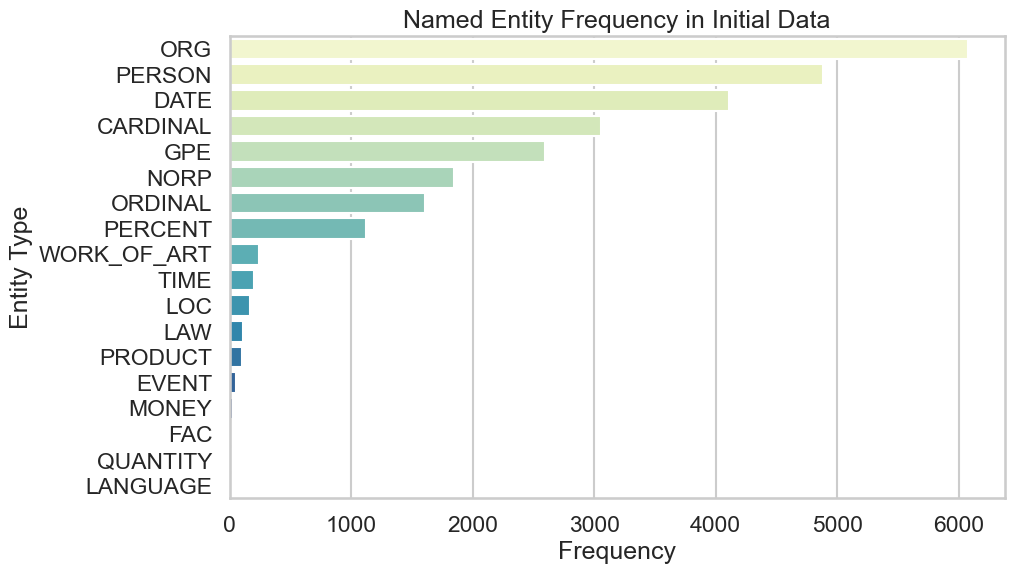

In [48]:
# Process and visualize entities for both datasets
process_and_visualize_entities(initial_data, "Initial Data")


Entity Types in Cleansed Data
Entity Type	Frequency	Percentage
ORG	1202	37.20%
DATE	453	14.02%
LOC	359	11.11%
CARDINAL	349	10.80%
NORP	277	8.57%
PRODUCT	267	8.26%
PERSON	164	5.08%
GPE	61	1.89%
TIME	50	1.55%
ORDINAL	45	1.39%
FAC	3	0.09%
LAW	1	0.03%


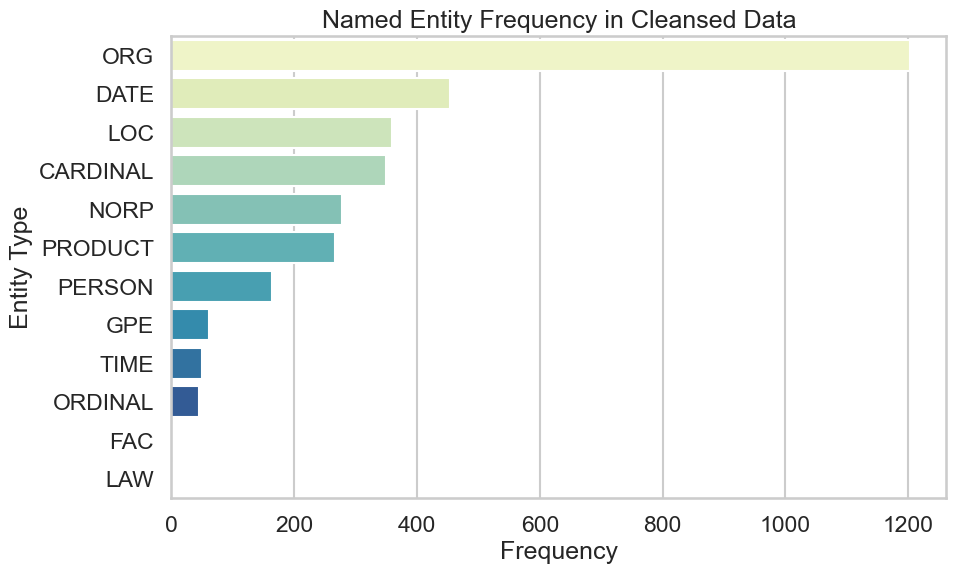

In [49]:
process_and_visualize_entities(cleansed_data, "Cleansed Data")

<p style="text-align: justify;">
In the initial data, the most frequent entities were <span style="color: teal;">ORG (23.14%)</span> and <span style="color: teal;">PERSON (18.61%)</span>, followed by <span style="color: teal;">DATE (15.65%)</span>, <span style="color: teal;">CARDINAL (11.64%)</span>, and <span style="color: teal;">GPE (9.88%)</span>. The dataset contained noise from rare and irrelevant entities like <span style="color: teal;">WORK_OF_ART</span> and <span style="color: teal;">LANGUAGE (<1%)</span> and an excessive frequency of <span style="color: teal;">PERSON</span>, adding irrelevant names.

After preprocessing, <span style="color: teal;">ORG</span> became the dominant entity (<span style="color: teal;">37.20%</span>), with significant increases in relevance for <span style="color: teal;">DATE (14.02%)</span>, <span style="color: teal;">LOC (11.11%)</span>, and <span style="color: teal;">PRODUCT (8.26%)</span>. Noise was reduced by removing rare categories, and <span style="color: teal;">PERSON</span> frequency dropped to <span style="color: teal;">5.08%</span>. The cleansed dataset focused on meaningful entities while reducing irrelevant ones, improving domain-specific relevance and clarity.
</p>

## **<span style="color: orange;"> Part-of-Speech </span>**
Part-of-Speech (POS) tagging to analyze the distribution of various grammatical categories (e.g., nouns, verbs, adjectives) in the text data with SpaCy

In [50]:
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")
print("spaCy model loaded successfully!")

# Define a function to extract POS tags
def get_pos_tags(text):
    """
    Extract Part-of-Speech (POS) tags from text.
    """
    doc = nlp(text)
    return [token.pos_ for token in doc]

# Function to process POS tags for a dataset
def process_pos_tags(df):
    # Apply the POS tagging function to the text data
    pos_tags = df['Content'].apply(lambda x: get_pos_tags(x))

    # Flatten the list of lists into a single list of POS tags
    pos_tags = [tag for sublist in pos_tags for tag in sublist]

    return pos_tags

spaCy model loaded successfully!


In [51]:
# Process POS tags for both datasets
pos_tags_initial = process_pos_tags(initial_data)
pos_tags_cleansed = process_pos_tags(cleansed_data)

# Count the occurrences of each POS tag
pos_counter_initial = Counter(pos_tags_initial)
pos_counter_cleansed = Counter(pos_tags_cleansed)

# Prepare the data for visualization
pos_counts_initial = pos_counter_initial.most_common()
pos_counts_cleansed = pos_counter_cleansed.most_common()

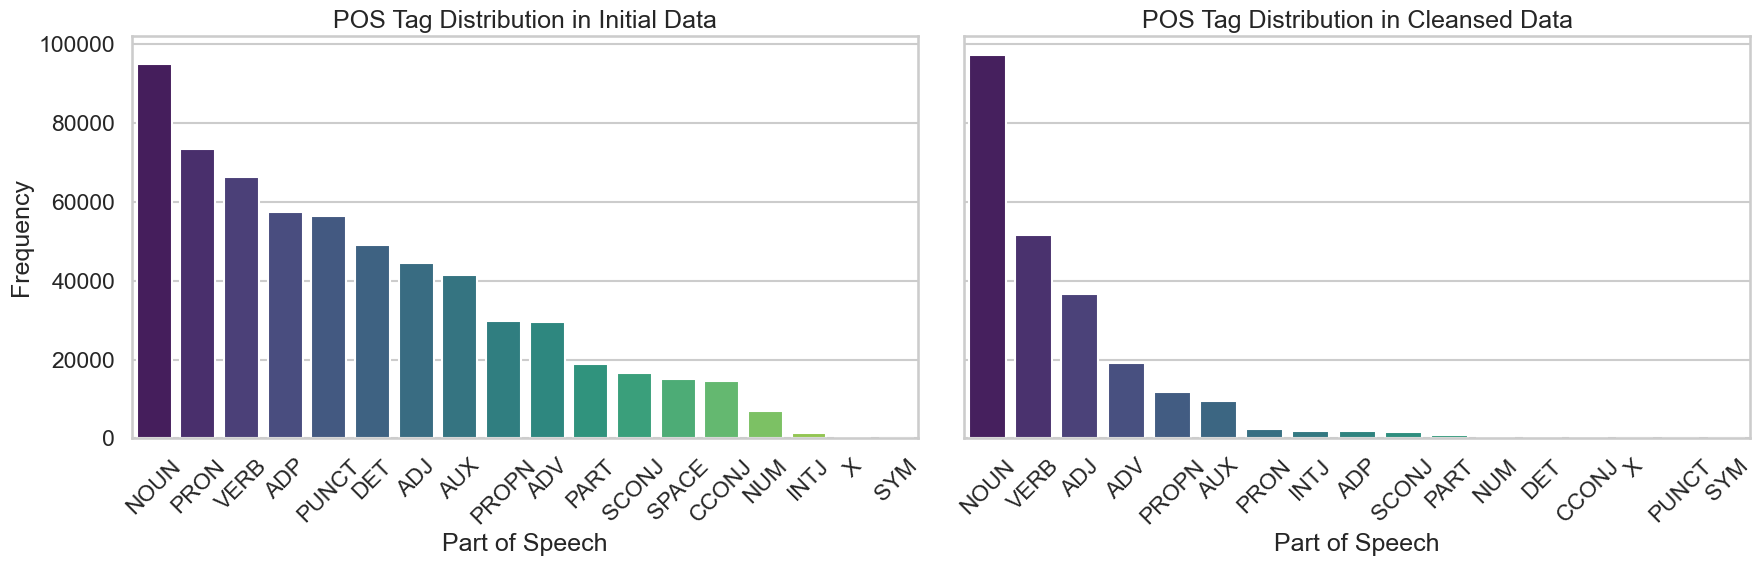

In [52]:
# Create subplots to visualize POS tag distribution for both datasets
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Visualize the POS tag distribution for initial data
x_initial, y_initial = zip(*pos_counts_initial)
sns.barplot(ax=axes[0], x=list(x_initial), y=list(y_initial), palette="viridis")
axes[0].set_xlabel('Part of Speech')
axes[0].set_ylabel('Frequency')
axes[0].set_title('POS Tag Distribution in Initial Data')
axes[0].tick_params(axis='x', rotation=45)

# Visualize the POS tag distribution for cleansed data
x_cleansed, y_cleansed = zip(*pos_counts_cleansed)
sns.barplot(ax=axes[1], x=list(x_cleansed), y=list(y_cleansed), palette="viridis")
axes[1].set_xlabel('Part of Speech')
axes[1].set_title('POS Tag Distribution in Cleansed Data')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Before:
In the initial data, nouns were the most frequent part of speech, followed by pronouns, verbs, and adpositions. Punctuation and determiners also contributed significantly, reflecting the unstructured nature of the text. Auxiliary verbs, proper nouns, and adjectives appeared moderately, while conjunctions, numbers, and interjections had minimal representation. Noise from punctuation and symbols diluted the analysis.


#### After:
After cleansing, nouns remained dominant, while verbs and adjectives gained prominence, reflecting a shift towards a focus on action and descriptive language. Pronouns and punctuation were reduced significantly, improving clarity. Rare tags like symbols and space were eliminated, streamlining the data. The cleansed dataset emphasizes meaningful content while reducing noise and irrelevant elements, enhancing its usability for downstream tasks.


## **<span style="color: orange;"> Sentiment Analysis  </span>**

In [53]:
!pip install textblob

In [58]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to calculate sentiment polarity
def calculate_sentiment(text):
    """
    Calculate the sentiment polarity of the text.
    """
    return TextBlob(text).sentiment.polarity

# Define a function to categorize sentiment into Positive, Negative, and Neutral
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Define a function to process sentiment for a dataset
def process_sentiment(df):
    # Apply the sentiment analysis function to the 'Content' column
    df['Sentiment'] = df['Content'].apply(calculate_sentiment)

    # Categorize sentiment into Positive, Negative, and Neutral
    df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)

    return df


In [59]:
# Process sentiment for both datasets
initial_data = process_sentiment(initial_data)
cleansed_data = process_sentiment(cleansed_data)

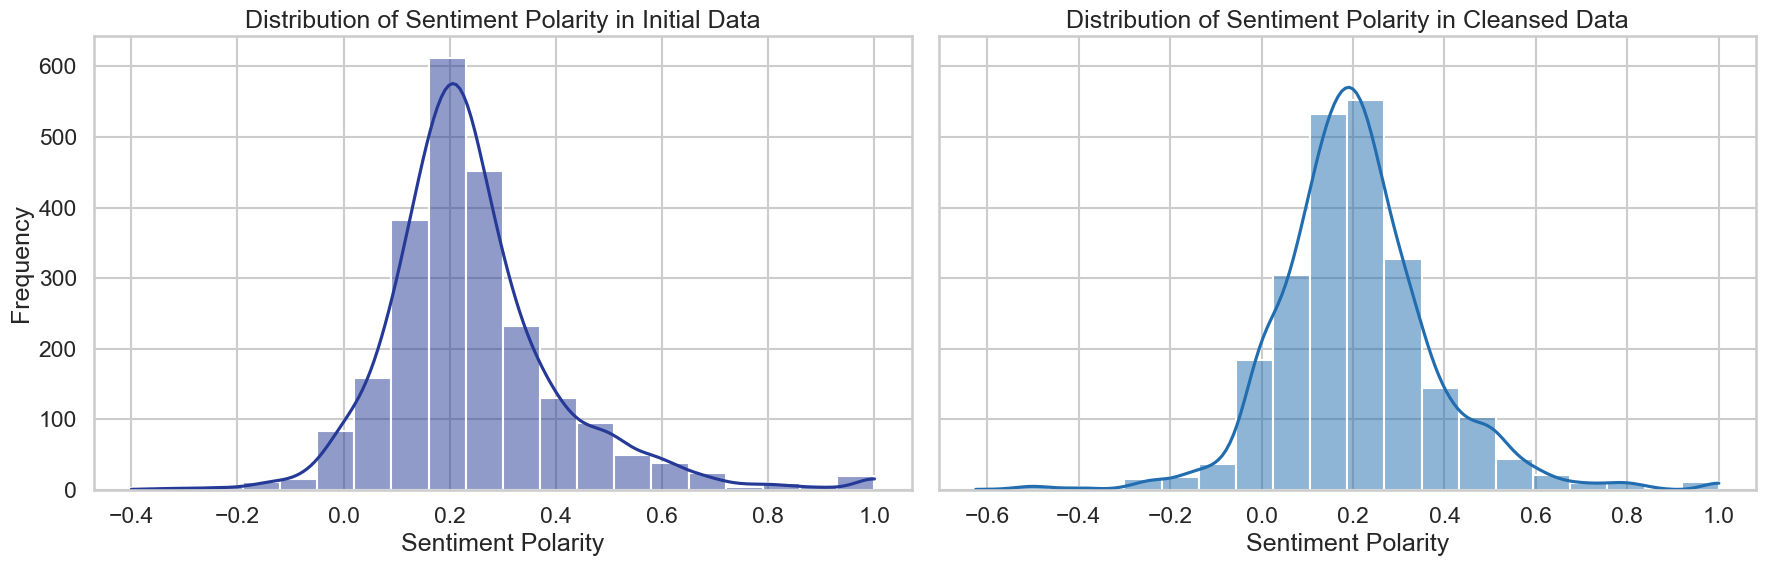

In [60]:
# Create subplots to visualize the distribution of sentiment polarity scores for both datasets
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Define the color palette and reverse it to start with darker colors
palette = sns.color_palette("YlGnBu")[::-1]

# Visualize the distribution of sentiment polarity scores for initial data
sns.histplot(ax=axes[0], data=initial_data['Sentiment'], bins=20, kde=True, color=palette[0])
axes[0].set_title('Distribution of Sentiment Polarity in Initial Data')
axes[0].set_xlabel('Sentiment Polarity')
axes[0].set_ylabel('Frequency')

# Visualize the distribution of sentiment polarity scores for cleansed data
sns.histplot(ax=axes[1], data=cleansed_data['Sentiment'], bins=20, kde=True, color=palette[1])
axes[1].set_title('Distribution of Sentiment Polarity in Cleansed Data')
axes[1].set_xlabel('Sentiment Polarity')

plt.tight_layout()
plt.show()

No big change visible in the polarity majority remains positive, graph still seems to be normally distributed and more densed than before.

In [61]:
# Function to process sentiment for a dataset
def process_sentiment(df):
    # Apply the sentiment analysis function to the 'Content' column
    df['Sentiment'] = df['Content'].apply(calculate_sentiment)

    # Categorize sentiment into Positive, Negative, and Neutral
    df['SentimentCategory'] = df['Sentiment'].apply(categorize_sentiment)

    return df

In [62]:
# Process sentiment for both datasets
initial_data = process_sentiment(initial_data)
cleansed_data = process_sentiment(cleansed_data)

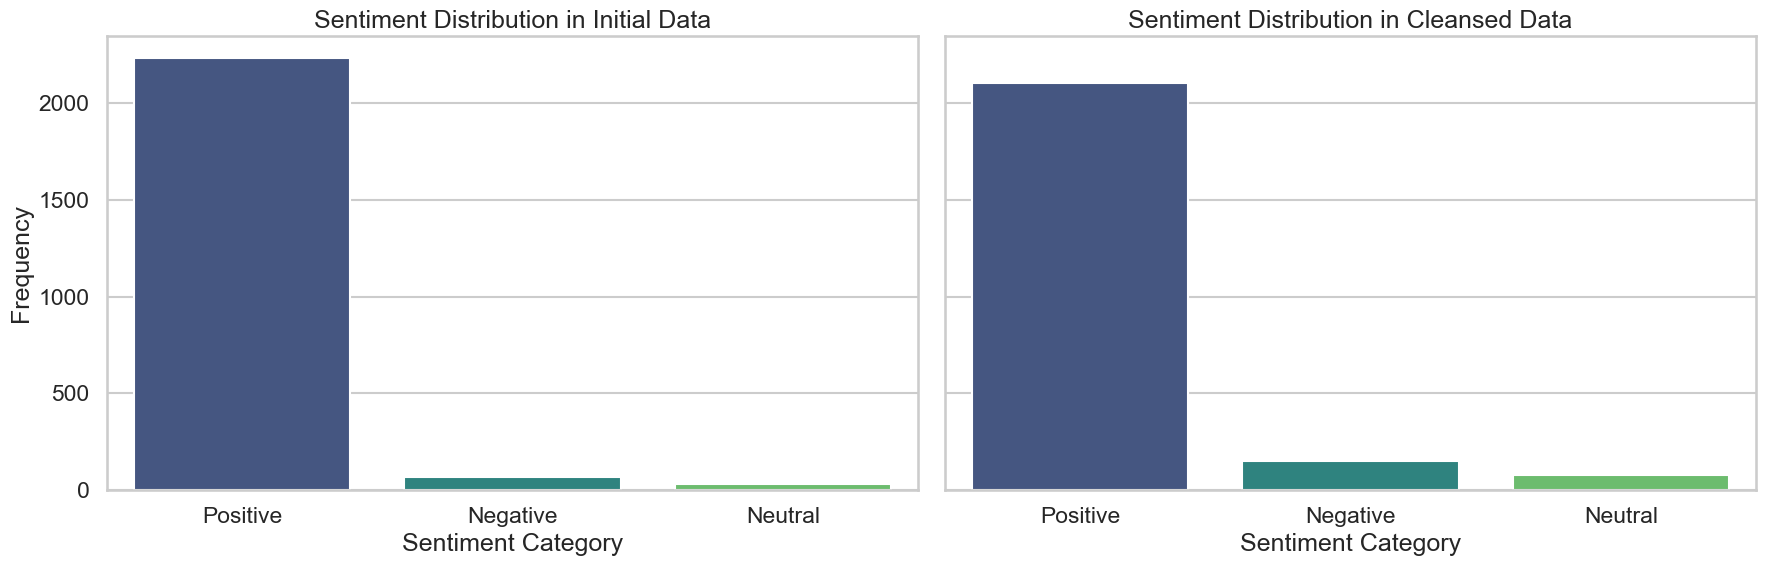

In [63]:
# Create subplots to visualize sentiment distribution for both datasets
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Visualize the sentiment distribution for initial data
sns.countplot(ax=axes[0], x='SentimentCategory', data=initial_data, palette='viridis')
axes[0].set_xlabel('Sentiment Category')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Sentiment Distribution in Initial Data')

# Visualize the sentiment distribution for cleansed data
sns.countplot(ax=axes[1], x='SentimentCategory', data=cleansed_data, palette='viridis')
axes[1].set_xlabel('Sentiment Category')
axes[1].set_title('Sentiment Distribution in Cleansed Data')

plt.tight_layout()
plt.show()

There is only a minor change since openings that included positive words like **<span style="color: teal;">"Dear"</span>** and closings like **<span style="color: teal;">"Best regards"</span>** were removed. The overall amount of positive words decreased, while the negative and neutral words remained the same in relevance. However, they appear to have bigger bars than before, even though there was no significant change.